## TP 1 - data mining - Thomas Ranvier, Nicolas Désilets

Setup et chargement des datasets

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jaccard

%matplotlib inline

datasets_names = ['chess', 'connect', 'mushroom', 'pumsb', 'pumsb_star', 'small', 'retail', 'kosarak']
datasets = {}

for name in datasets_names:
    temp_str = [i.strip().split() for i in open('datasets/' + name + '.dat').readlines()]
    datasets[name] = [list(map(int, line)) for line in temp_str]

## 1.

#### Implémentation de l'algorithme d'échantillonage des motifs fréquents

In [117]:
#Part of the algorithm that needs to be run each time
def freq_sampling(dataset, w, normalised_w):
    random_pattern_index = np.random.choice(len(dataset), p=normalised_w)#2.
    return [attr for attr in dataset[random_pattern_index] if np.random.randint(2)]#3.

#Function that runs the algorithm k times
def freq_sampling_k(dataset, k):
    patterns = []
    #We create the weights out of the loop so it takes less time overall
    w = [2**abs(len(motif)) for motif in dataset]#1.
    normalised_w = [i / sum(w) for i in w]
    done = False
    for _ in range(k):
        patterns.append(tuple(freq_sampling(dataset, w, normalised_w)))
    return patterns

#Function that runs the algo for all loaded datasets, except kosarak and retail
def freq_sampling_all_datasets(k):
    patterns_freq = {}
    for dataset_name in datasets:
        if dataset_name != 'kosarak' and dataset_name != 'retail':
            patterns_freq[dataset_name] = freq_sampling_k(datasets[dataset_name], k)
            print('dataset ' + dataset_name + ' done')
    return patterns_freq

## 2.

#### Implémentation de l'algorithme d'échantillonage basé sur l'aire

In [116]:
def area_sampling(dataset, w, normalised_w):
    random_pattern_index = np.random.choice(len(dataset), p=normalised_w)#2.
    k_range = list(range(1, len(dataset[random_pattern_index]) + 1))#weights id(i) = i
    normalised_k_range = [i / sum(k_range) for i in k_range]
    k = np.random.choice(k_range, p=normalised_k_range)#3.
    return sorted(np.random.choice(dataset[random_pattern_index], size=k, replace=False))#4.

#Function that runs the algorithm k times
def area_sampling_k(dataset, k):
    patterns = []
    #We create the weights out of the loop so it takes less time overall
    w = [abs(len(motif))*(2**(abs(len(motif)) - 1)) for motif in dataset]#1.
    normalised_w = [i / sum(w) for i in w]
    for _ in range(k):
        patterns.append(tuple(area_sampling(dataset, w, normalised_w)))
    return patterns

#Function that runs the algo for all loaded datasets, except kosarak and retail
def area_sampling_all_datasets(k):
    patterns_area = {}
    for dataset_name in datasets:
        if dataset_name != 'kosarak' and dataset_name != 'retail':
            patterns_area[dataset_name] = freq_sampling_k(datasets[dataset_name], k)
            print('dataset ' + dataset_name + ' done')
    return patterns_area

Exécution des algos des questions 1 et 2, pour tous les datasets chargés et 1000 itérations à chaque fois

In [118]:
sampled_patterns_freq = freq_sampling_all_datasets(1000)

dataset chess done
dataset connect done
dataset mushroom done
dataset pumsb done
dataset pumsb_star done
dataset small done


In [5]:
sampled_patterns_area = area_sampling_all_datasets(1000)

dataset chess done
dataset connect done
dataset mushroom done
dataset pumsb done
dataset pumsb_star done
dataset small done


## 3.

#### Implémentation de la fonction qui, donné un ensemble de motifs extraits et le dataset correspondant, renvoie la fréquence de chaque motif

La fonction 'pattern_freq' calcule la fréquence d'apparition du pattern donné au sein du dataset dont il est extrait.

In [119]:
def pattern_freq(pattern, dataset):
    freq = .0
    for p in dataset:
        appears_in_p = True
        for attr in pattern:
            if attr not in p:
                appears_in_p = False
                break
        if appears_in_p:
            freq += 1.
    return freq / len(dataset)

def patterns_freq(patterns, dataset):
    result = {}
    for pattern in patterns:
        result[pattern] = pattern_freq(pattern, dataset)
    return result

#### Implémentation de la fonction qui, donné un ensemble de motifs extraits et le dataset correspondant, renvoie l'aire de chaque motif

In [120]:
def patterns_area(p_f):
    p_a = {}
    for i in p_f.items():
        p_a[i[0]] = i[1] * len(i[0])
    return p_a

## 5.

#### Affichage des distributions pour 5 datasets et 1000 réalisations

In [121]:
def display_distributions(sampled_patterns, dataset_name):
    p_f = patterns_freq(sampled_patterns, datasets[dataset_name])
    p_a = patterns_area(p_f)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
    ax1.hist(list(p_f.values()), bins=60)
    ax1.set_title('Histogramme des fréquences')
    ax2.hist(list(p_a.values()), bins=60)
    ax2.set_title('Histogramme des aires')

## Dataset : chess

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'chess' par l'algorithme 1

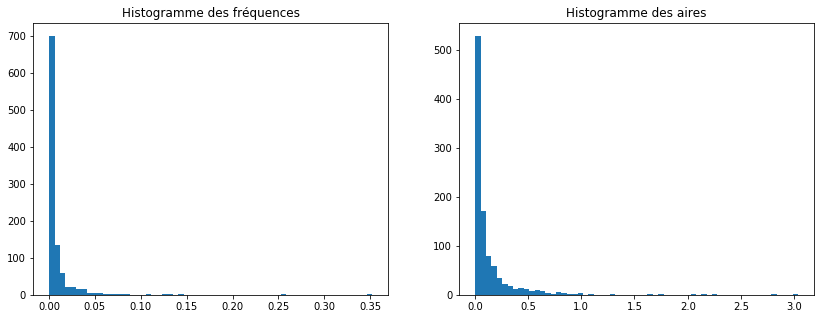

In [122]:
display_distributions(list(set(sampled_patterns_freq['chess'])), 'chess')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'chess' par l'algorithme 2

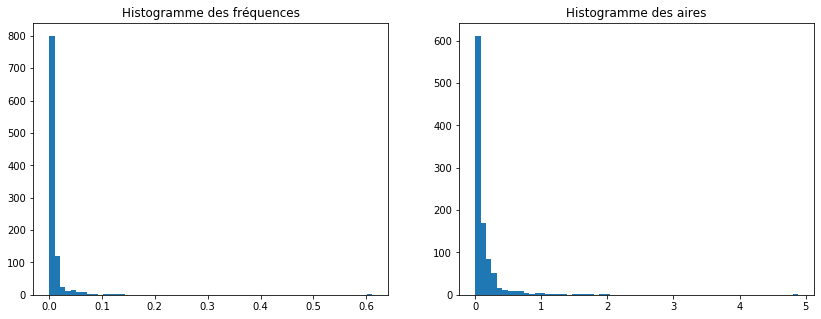

In [95]:
display_distributions(list(set(sampled_patterns_area['chess'])), 'chess')

## Dataset : connect

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'connect' par l'algorithme 1

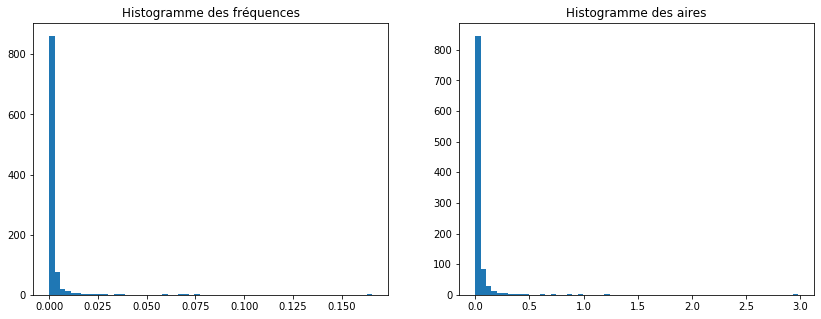

In [96]:
display_distributions(list(set(sampled_patterns_freq['connect'])), 'connect')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'connect' par l'algorithme 2

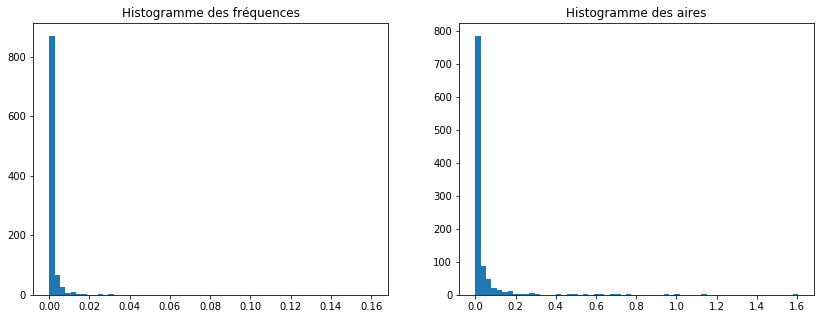

In [97]:
display_distributions(list(set(sampled_patterns_area['connect'])), 'connect')

## Dataset : mushroom

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'mushroom' par l'algorithme 1

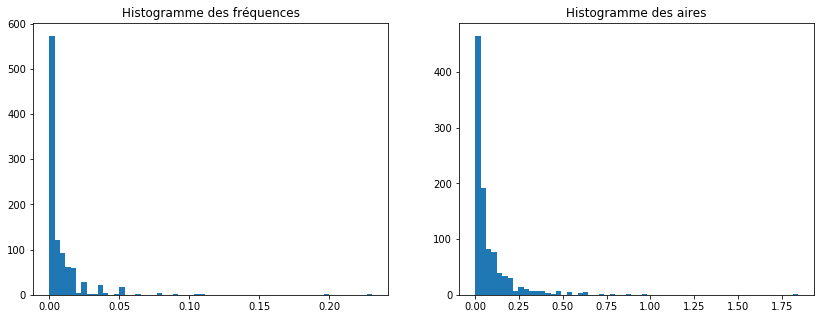

In [98]:
display_distributions(list(set(sampled_patterns_freq['mushroom'])), 'mushroom')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'mushroom' par l'algorithme 2

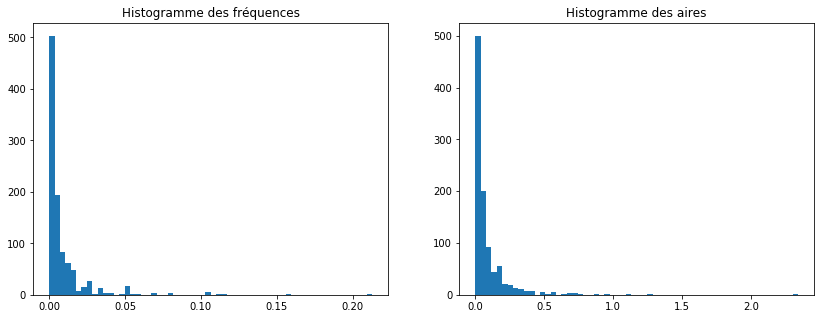

In [99]:
display_distributions(list(set(sampled_patterns_area['mushroom'])), 'mushroom')

## Dataset : pumsb

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'pumsb' par l'algorithme 1

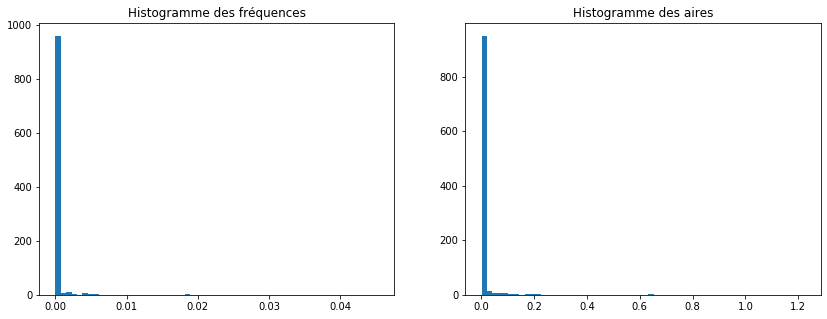

In [100]:
display_distributions(list(set(sampled_patterns_freq['pumsb'])), 'pumsb')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'pumsb' par l'algorithme 2

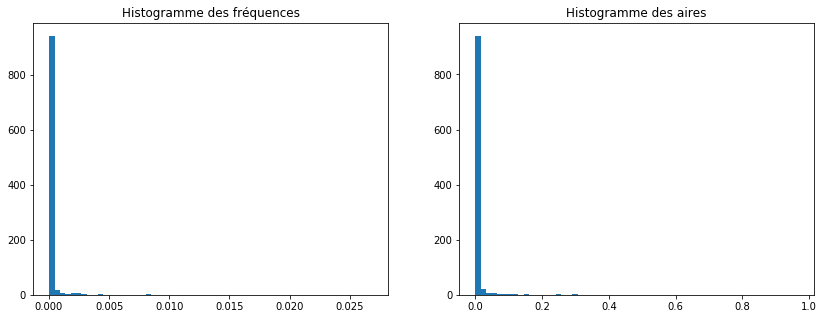

In [101]:
display_distributions(list(set(sampled_patterns_area['pumsb'])), 'pumsb')

## Dataset : pumsb_star

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'pumsb_star' par l'algorithme 1

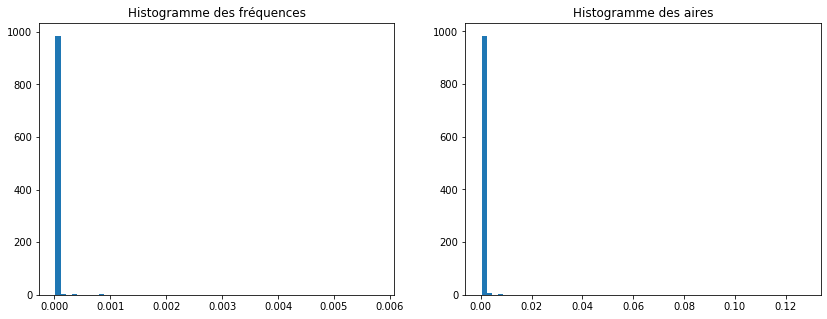

In [102]:
display_distributions(list(set(sampled_patterns_freq['pumsb_star'])), 'pumsb_star')

Affichage des distributions de fréquence et d'aires pour les patterns extraits du dataset 'pumsb_star' par l'algorithme 2

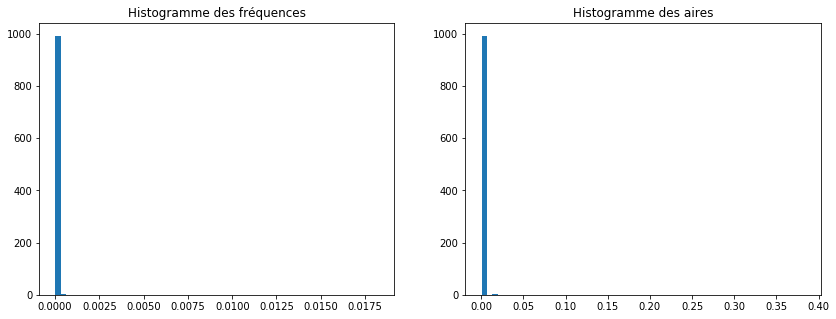

In [103]:
display_distributions(list(set(sampled_patterns_area['pumsb_star'])), 'pumsb_star')

## 6.

#### Mise en place de l'expérience permettant d'évaluer la diversité de k tirages

Pour évaluer la diversité des patterns extraits par nos algorithmes nous avons trouvé le 'Jaccard similarity coefficient', celui-ci permet de jauger la similiarité et la diversité entre deux sets.

Nous allons donc calculer le coefficient de similarité entre un tirage et le suivant afin de vérifier qu'ils ne soient pas trop similaires.

L'index de Jaccard se calcule simplement de cette manière : |intersection| / |union|.
Nous avons donc implémenter une fonction qui applique cette formule entre 2 patterns, nous l'appellons entre tous les patterns extraits et renvoyons la moyenne de tous les indices ainsi récoltés.

Plus la valeur obtenue est basse et moins les patterns extraits sont similaires.
Nous obtenons des valeurs entre .1 et .2 pour tous les datasets, ce qui tend à montrer que les algorithmes permettent d'extraire des patterns fréquents avec une bonne diversité, grantissant ainsi l'intérêt des patterns extraits.

In [172]:
def jaccard_index(p_1, p_2):
    intersection = len(p_1.intersection(p_2))
    union = len(p_1) + len(p_2) - intersection
    return 1. if union == 0 else intersection / union

def avg_jaccard_index(patterns):
    j_index = .0
    nb = .0
    for i in range(len(patterns) - 1):
        for j in range(i + 1, len(patterns)):
            j_index += custom_jaccard(set(patterns[i]), set(patterns[j]))
            nb += 1.
    return j_index / nb

In [173]:
print('Moyenne des indices de Jaccard, dataset chess : ' + str(avg_jaccard_index(sampled_patterns_freq['chess'])))
print('Moyenne des indices de Jaccard, dataset chess : ' + str(avg_jaccard_index(sampled_patterns_freq['connect'])))
print('Moyenne des indices de Jaccard, dataset chess : ' + str(avg_jaccard_index(sampled_patterns_freq['mushroom'])))
print('Moyenne des indices de Jaccard, dataset chess : ' + str(avg_jaccard_index(sampled_patterns_freq['pumsb'])))
print('Moyenne des indices de Jaccard, dataset chess : ' + str(avg_jaccard_index(sampled_patterns_freq['pumsb_star'])))

Moyenne des indices de Jaccard, dataset chess : 0.22533046757324557
Moyenne des indices de Jaccard, dataset chess : 0.22667274230633674
Moyenne des indices de Jaccard, dataset chess : 0.13941463281926428
Moyenne des indices de Jaccard, dataset chess : 0.16456875298411594
Moyenne des indices de Jaccard, dataset chess : 0.11359721786740264


## 7.

#### Mise en place de l'expérience permettant de mettre en évidence que la probabilité d'un motif d'être tiré est proportionnelle à sa mesure

Affichage d'un scatter plot entre fréquence de tirage et fréquence au sein du dataset

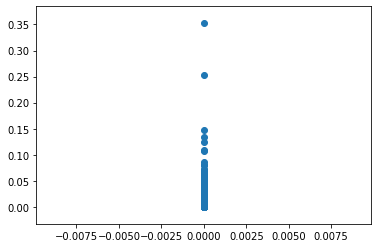

In [176]:
p_df = {}

for pattern in sampled_patterns_freq['small']:
    if pattern not in p_df:
        p_df[pattern] = 0
    else:
        p_df[pattern] += 1

p_f = patterns_freq(sampled_patterns_freq['small'], datasets['small'])

df = []
f = []
for i in p_df.items():
    df.append(i[1])
    f.append(p_f[i[0]])

plt.scatter(df, f)

## 8.

#### Résolution du problème avec 'kosarak'

Affichage des distributions sans aucune modification

In [111]:
sampled_patterns_freq['kosarak'] = freq_sampling_k(datasets['kosarak'], 250)
display_distributions(list(set(sampled_patterns_freq['kosarak'])), 'kosarak')

KeyboardInterrupt: 

In [ ]:
sampled_patterns_area['kosarak'] = area_sampling_k(datasets['kosarak'], 250)
display_distributions(list(set(sampled_patterns_area['kosarak'])), 'kosarak')

Implémentation de l'algorithme a-priori pour comparaison

In [14]:
def a_priori(dataset, minsup):
    flattened_dataset = [i for sublist in dataset for i in sublist]
    c = [[[i] for i in sorted(list(set(flattened_dataset)))]]
    f = []
    i = 0
    over = False
    while not over:
        f.append(evaluate(c[i], dataset, minsup))
        ci = gen_candidates(f[i])
        if len(ci) == 0:
            over = True
        else:
            c.append(ci)
            i += 1
    return (c, f)

def evaluate(ci, dataset, minsup):
    fi = []
    for candidate in ci:
        count = 0
        for line in dataset:
            in_line = True
            for attr in candidate:
                if attr not in line:
                    in_line = False
                    break
            count += in_line
        if count >= minsup:
            fi.append(candidate)
    return fi

def gen_candidates(fi):
    ci = []
    if len(fi) > 1:
        for i in range(len(fi) - 1):
            for j in range(i + 1, len(fi)):
                if len(fi[i]) == 1:
                    ci.append([fi[i][0], fi[j][0]])
                else:
                    if fi[i][1:] == fi[j][:-1]:
                        cii = [fi[i][0]]
                        cii.extend(fi[j])
                        ci.append(cii)
    return ci

In [15]:
c, f = a_priori(datasets['small'], 3)

In [16]:
for cand in c:
    print(cand)

[[1], [2], [3], [4], [5], [6], [7], [9], [10], [16], [24], [65], [66], [78], [120]]
[[1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 16], [1, 65], [2, 3], [2, 4], [2, 5], [2, 6], [2, 16], [2, 65], [3, 4], [3, 5], [3, 6], [3, 16], [3, 65], [4, 5], [4, 6], [4, 16], [4, 65], [5, 6], [5, 16], [5, 65], [6, 16], [6, 65], [16, 65]]
[[1, 3, 4], [1, 3, 5], [1, 3, 6], [1, 3, 16], [1, 3, 65], [1, 4, 5], [1, 4, 6], [1, 4, 16], [1, 16, 65], [3, 4, 5], [3, 4, 6], [3, 4, 16], [3, 5, 6], [3, 16, 65], [4, 5, 6], [4, 16, 65]]
[[1, 3, 4, 5], [1, 3, 4, 6], [1, 3, 16, 65], [3, 4, 5, 6]]


In [17]:
for pattern in f:
    print(pattern)

[[1], [2], [3], [4], [5], [6], [16], [65]]
[[1, 3], [1, 4], [1, 16], [1, 65], [3, 4], [3, 5], [3, 6], [3, 16], [3, 65], [4, 5], [4, 6], [4, 16], [5, 6], [16, 65]]
[[1, 3, 4], [1, 3, 16], [1, 3, 65], [1, 16, 65], [3, 4, 5], [3, 4, 6], [3, 5, 6], [3, 16, 65], [4, 5, 6]]
[[1, 3, 16, 65], [3, 4, 5, 6]]
